In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\User\Downloads\ab_test_data.csv')


In [3]:
data.head(10)

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0
5,0c6aad3a-8068-473c-98ea-88abbcacbe67,2023-07-15 21:13:55.067827,b,0
6,397c76e4-a4db-4712-b3ce-febfb13cb634,2023-07-18 07:03:05.315509,b,0
7,9b1f084d-8a7f-4526-b859-4935ca99482c,2023-07-17 12:11:21.902593,a,0
8,37ade847-cd45-4ca7-99c6-13fe881e7f42,2023-07-24 23:35:24.243933,b,0
9,b856113a-75d4-4911-894c-4d4c75f37c34,2023-07-22 19:38:24.460128,a,0


In [4]:
data.info

<bound method DataFrame.info of                                     user_id                   timestamp  \
0      7f6833e6-1141-4f20-b4b2-f1e31019b1fd  2023-07-04 04:40:55.848109   
1      e6a6e960-d3f3-4074-a516-ba1e609b211e  2023-07-06 00:26:45.486187   
2      4d3fbfa5-6847-410a-bac2-477f01d5f400  2023-07-10 20:24:33.639464   
3      361457d9-a044-48f7-981c-d67dc3861679  2023-07-20 07:04:49.957013   
4      285cd63d-7d03-427f-a062-1fa2dd2e77d6  2023-07-19 23:27:50.116680   
...                                     ...                         ...   
19993  6763ae9a-515c-473e-af00-0d9c4f6a5bc7  2023-07-06 03:27:37.041104   
19994  ac5600f2-4d16-4503-b115-f1a96728b6d1  2023-07-03 04:20:48.572143   
19995  5a8b2630-209b-4d83-b47f-0f3d9dd568a8  2023-07-23 16:23:49.211910   
19996  b572d68b-26ac-432b-9f88-83e0fdee4ca1  2023-07-03 18:26:20.880675   
19997  3d313adc-c8d6-43f2-8b4e-e267b194ff78  2023-07-19 13:15:37.562340   

      test_group  conversion  
0              a           0  
1    

Виведення кількості користувачів у групах

In [27]:
users_group_a = data[data['test_group'] == 'a']['user_id'].nunique()
users_group_b = data[data['test_group'] == 'b']['user_id'].nunique()

print(f'Кількість користувачів в групі a: {users_group_a}')
print(f'Кількість користувачів в групі b: {users_group_b}')

Кількість користувачів в групі a: 10013
Кількість користувачів в групі b: 9985


 Кількість конверсій у групах

In [26]:
conversions_group_a = data[data['test_group'] == 'a']['conversion'].sum()
conversions_group_b = data[data['test_group'] == 'b']['conversion'].sum()

print(f'Кількість конверсій в групі a: {conversions_group_a}')
print(f'Кількість конверсій в групі b: {conversions_group_b}')

Кількість конверсій в групі a: 611
Кількість конверсій в групі b: 889


Рівень конверсії у групах

In [7]:
conversion_rate_group_a = conversions_group_a / users_group_a
conversion_rate_group_b = conversions_group_b / users_group_b

print(f'Рівень конверсії в групі a: {conversion_rate_group_a:.2%}')
print(f'Рівень конверсії в групі b: {conversion_rate_group_b:.2%}')

Рівень конверсії в групі a: 6.10%
Рівень конверсії в групі b: 8.90%


Знаходження дати початку та кінця тесту

In [17]:
start_date = data['timestamp'].min()
end_date = data['timestamp'].max()
print(f'Дата початку тесту: {start_date}')
print(f'Дата кінця тесту: {end_date}')

Дата початку тесту: 2023-07-03 01:42:34.033708
Дата кінця тесту: 2023-07-25 01:41:19.152664


Знаходження кількості днів тестування

In [18]:
test_duration_days = (end_date - start_date).days + 1
print(f'Тривалість тесту: {test_duration_days} днів')

Тривалість тесту: 22 днів


Використовуємо т-тест Стьюдента для незалежних вибірок

In [23]:
from scipy.stats import ttest_ind
t_stat, p_value_t = ttest_ind(data[data['test_group'] == 'a']['conversion'], 
                              data[data['test_group'] == 'b']['conversion'])
print(f'Значення статистики t: {t_stat}')
print(f'P-value: {p_value_t}')
alpha = 0.05
if p_value_t < alpha:
    print('Відхиляємо нульову гіпотезу: існує статистично значуща різниця')
else:
    print('Не відхиляємо нульову гіпотезу: немає статистично значущої різниці')

Значення статистики t: -7.5299531387344185
P-value: 5.2910576385178764e-14
Відхиляємо нульову гіпотезу: існує статистично значуща різниця


Використовуємо критерій хі-квадрат

In [24]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['test_group'], data['conversion'])
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f'Значення статистики хі-квадрат: {chi2_stat}')
print(f'P-value: {p_value_chi2}')
alpha = 0.05
if p_value_chi2 < alpha:
    print('Відхиляємо нульову гіпотезу: існує статистично значуща різниця')
else:
    print('Не відхиляємо нульову гіпотезу: немає статистично значущої різниці')

Значення статистики хі-квадрат: 56.14249485320227
P-value: 6.740440730497395e-14
Відхиляємо нульову гіпотезу: існує статистично значуща різниця


In [25]:
contingency_table.head

<bound method NDFrame.head of conversion     0    1
test_group           
a           9402  611
b           9096  889>

Використовуємо точний тест Фішера

In [28]:
from scipy.stats import fisher_exact
contingency_table = pd.crosstab(data['test_group'], data['conversion'])
odds_ratio, p_value_fisher = fisher_exact(contingency_table)
print(f'Odds Ratio: {odds_ratio}')
print(f'P-value: {p_value_fisher}')
alpha = 0.05
if p_value_fisher < alpha:
    print('Відхиляємо нульову гіпотезу: існує статистично значуща різниця')
else:
    print('Не відхиляємо нульову гіпотезу: немає статистично значущої різниці')

Odds Ratio: 1.5039394305800864
P-value: 4.8924849253464877e-14
Відхиляємо нульову гіпотезу: існує статистично значуща різниця


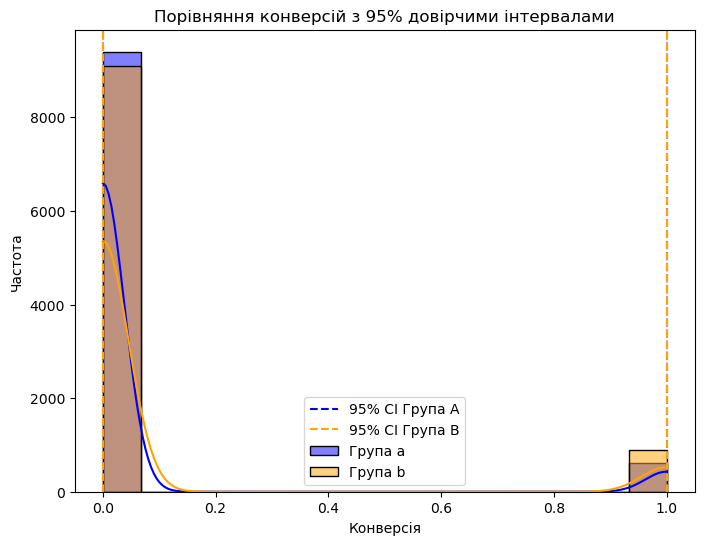

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Групуємо дані за групами
group_a_data = data[data['test_group'] == 'a']['conversion']
group_b_data = data[data['test_group'] == 'b']['conversion']

# Створюємо фігуру та вісь
fig, ax = plt.subplots(figsize=(8, 6))

# Побудова гістограм
sns.histplot(group_a_data, label='Група a', kde=True, color='blue', ax=ax)
sns.histplot(group_b_data, label='Група b', kde=True, color='orange', ax=ax)

# Побудова 95% довірчих інтервалів для середніх
ci_a = np.percentile(group_a_data, [2.5, 97.5])
ci_b = np.percentile(group_b_data, [2.5, 97.5])

# Побудова ліній для довірчих інтервалів
ax.axvline(ci_a[0], linestyle='--', color='blue', label='95% CI Група A')
ax.axvline(ci_a[1], linestyle='--', color='blue')

ax.axvline(ci_b[0], linestyle='--', color='orange', label='95% CI Група B')
ax.axvline(ci_b[1], linestyle='--', color='orange')

# Додаємо легенду
plt.legend()

# Налаштовуємо відображення
plt.title('Порівняння конверсій з 95% довірчими інтервалами')
plt.xlabel('Конверсія')
plt.ylabel('Частота')

# Відображення графіка
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_46552\3288540313.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='test_group', y='conversion', data=data, ci=95)


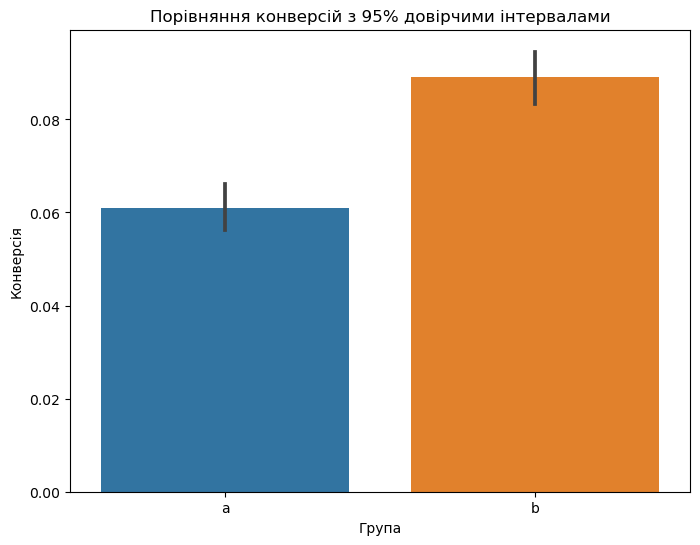

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='test_group', y='conversion', data=data, ci=95)
plt.title('Порівняння конверсій з 95% довірчими інтервалами')
plt.xlabel('Група')
plt.ylabel('Конверсія')
plt.show()

За результатами проведеного аналізу, робимо висновок про доцільність впровадження змін про написання примітки щодо знижки 50%. Це дало можливість підвищити рівень конверсії на 2.8 % при відносно незначних вкладених витратах. Статистичні тести показали, що даний результат не є випадковим, а має статистичну значущість. Ріст конверсії майже на 3% скоріше матиме позитивний вплив на цілі та ефективність продукту чи сервісу.

Серед додаткових рекомендацій можна зазначити:

1. ПРиділення уваги в пропозиції не лише до зміни ціни, а у її візуальному представленні. Влучні мітки можуть суттєво впливати на сприйняття користувачів

2. Спроби запровадити досвід даного тестування до інших продуктів компанії

3. РОзглянути доцільність сегментації цільової аудиторії, щоби вияснити яка з них більш чутлива до сформованої пропозиції, а яка ні

4. Необхідно памятати про вплив часу - у довгостроковому періоді результат від даної пропозиції може знижуватися, адже в цілому від сконструйований на ефекті неочікуваності, адже акції у 50% не можуть тривати постійно

Можливі ризики запровадження

1. ОДноразовість проведення тесту може бути залежна від конкретного контексту періоду проведення - свята, сезонність, тощо.

2. Користувачі можуть змінити свої поведінкові патерни під впливом учісті в експерименті, виявивши зокрема відсутність реальної знижки

3. МОжливість присутності інших факторів, невраховних у тесті та аналізі

4. Щоби знизити вплив ризиків, варто уважно слідкувати за поведінкою користувачів, використовувати гіпотези обережно і без надмірних узагальнень



Загальний висновок по тесту: рекомендовано запровадити зміни на період 1 міс